In [1]:
import pandas as pd
import re
import string
# from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from nltk.probability import FreqDist
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [4]:
!pip install swifter


You should consider upgrading via the 'C:\Users\admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16322 sha256=874a005a41773747a6a1de402a5903fa21fea414bcf34f72f44140fc3174718c
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\6c\bd\3e\2d6afc9bc36c9975f8e4215a270bbac6580c4361ebd6bb2323
Successfully built swifter


In [5]:
data_df = pd.read_csv("../rtgender/reddit_posts.csv")

In [6]:
data_df.head()

,op_id,op_gender,post_id,post_text,subreddit,op_gender_visible
0,Kastoli,M,0,slayer task perhaps?,2007scape,False
1,Kastoli,M,1,"Black DHide legs, possibly an initiate pure?",2007scape,False
2,DCBizzle,M,2,Whats a tonk? lol,2007scape,False
3,ordona,M,3,Do the Stronghold of Security for a free 10k t...,2007scape,False
4,SlayerMaster,M,4,I cant tell if this guy just doesnt speak Engl...,2007scape,False


In [7]:
data_df1 = data_df.copy()

In [8]:
# Load spacy
nlp = spacy.load('en_core_web_sm')

def clean_string(text, stopwords = False, stem="None"):

    final_string = ""

    # Make lower
    text = text.lower()

#     # Remove line breaks
#     text = re.sub(r'\n', '', text)

#     # Remove puncuation
#     translator = str.maketrans('', '', string.punctuation)
#     text = text.translate(translator)

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\S+www\S+', '', text)
    
    
    # Remove stop words
    text = text.split()
    text_filtered = text
    if stopwords == True:
        useless_words = nltk.corpus.stopwords.words("english")
#         useless_words = useless_words + ['hi', 'im']

        text_filtered = [word for word in text if not word in useless_words]

        # Remove numbers
        text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
#     else:
#         text_filtered = text
    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [9]:
data_df2 = data_df.copy()


In [10]:
data_df2['post_text'] = data_df2['post_text'].astype(str)

In [12]:
import swifter

data_df2['post_text_cleaned'] = data_df2['post_text'].swifter.apply(lambda x: clean_string(x, stopwords = True, stem='Lem'))


Pandas Apply:   0%|          | 0/1453512 [00:00<?, ?it/s]

In [13]:
data_df2['post_text_cleaned']

0                                       slayer task perhaps?
1                  black dhide legs, possibly initiate pure?
2                                            whats tonk? lol
3                           stronghold security free  start.
4          cant tell guy doesnt speak english total retar...
                                 ...                        
1453507    got game summer sale say im really enjoying it...
1453508      id argue origin access even better, personally.
1453509    better selection non-ea games. thing missing v...
1453510    dont know much game, ive heard relaxing. nothi...
1453511    lego game arent kids, theyre enjoyable ages. s...
Name: post_text_cleaned, Length: 1453512, dtype: object

In [14]:
data_df2['post_text_cleaned1'] = data_df2['post_text_cleaned'].str.split()

In [15]:
data_df2['post_text_cleaned1']

0                                   [slayer, task, perhaps?]
1           [black, dhide, legs,, possibly, initiate, pure?]
2                                        [whats, tonk?, lol]
3                       [stronghold, security, free, start.]
4          [cant, tell, guy, doesnt, speak, english, tota...
                                 ...                        
1453507    [got, game, summer, sale, say, im, really, enj...
1453508    [id, argue, origin, access, even, better,, per...
1453509    [better, selection, non-ea, games., thing, mis...
1453510    [dont, know, much, game,, ive, heard, relaxing...
1453511    [lego, game, arent, kids,, theyre, enjoyable, ...
Name: post_text_cleaned1, Length: 1453512, dtype: object

In [16]:
data_df2['post_text_cleaned']

0                                       slayer task perhaps?
1                  black dhide legs, possibly initiate pure?
2                                            whats tonk? lol
3                           stronghold security free  start.
4          cant tell guy doesnt speak english total retar...
                                 ...                        
1453507    got game summer sale say im really enjoying it...
1453508      id argue origin access even better, personally.
1453509    better selection non-ea games. thing missing v...
1453510    dont know much game, ive heard relaxing. nothi...
1453511    lego game arent kids, theyre enjoyable ages. s...
Name: post_text_cleaned, Length: 1453512, dtype: object

In [17]:
data_df2.to_csv("./preprocessed_data/reddit_posts_preprocssed_lem_stopwords_removal.csv")

In [18]:
all_words1 = ''
all_words = data_df2.groupby(['op_gender']).agg({'post_text_cleaned': ' '.join}).reset_index()
print(all_words)


  op_gender                                  post_text_cleaned
0         M  slayer task perhaps? black dhide legs, possibl...
1         W  head op, comment reddit also show poster name ...


In [19]:



all_words[all_words['op_gender']=='M']['post_text_cleaned']

0    slayer task perhaps? black dhide legs, possibl...
Name: post_text_cleaned, dtype: object

In [20]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_M = FreqDist(all_words[all_words['op_gender']=='M']['post_text_cleaned'][0].split())
# fd_wct1_M

In [21]:
fd_wct1_F = FreqDist(all_words[all_words['op_gender']=='W']['post_text_cleaned'].values[0].split(" "))


In [22]:
print(fd_wct1_M.most_common(40))


[('like', 188049), ('dont', 160199), ('get', 141469), ('im', 138044), ('people', 136793), ('would', 134984), ('one', 120136), ('think', 106666), ('make', 89567), ('thats', 80627), ('know', 79829), ('really', 79001), ('youre', 78205), ('even', 76011), ('want', 71109), ('time', 68274), ('thing', 67483), ('go', 66477), ('good', 64802), ('-', 63482), ('it.', 63371), ('much', 61158), ('going', 58658), ('see', 56921), ('could', 56866), ('say', 56491), ('still', 55915), ('>', 53639), ('.', 53249), ('doesnt', 52420), ('also', 51718), ('need', 51197), ('way', 50297), ('never', 49634), ('year', 47721), ('cant', 47704), ('ive', 47123), ('something', 45318), ('got', 45224), ('lot', 45038)]


In [23]:
print(fd_wct1_F.most_common(40))


[('like', 64831), ('dont', 57716), ('im', 54344), ('', 47290), ('get', 47128), ('people', 46590), ('would', 41546), ('think', 38549), ('one', 38100), ('know', 30500), ('make', 30192), ('really', 29982), ('want', 28345), ('youre', 27388), ('even', 24843), ('thing', 24385), ('thats', 24254), ('time', 23718), ('go', 22433), ('it.', 21036), ('going', 19762), ('someone', 19105), ('say', 18778), ('much', 18413), ('ive', 18340), ('never', 18333), ('need', 18322), ('-', 18249), ('also', 18214), ('woman', 18172), ('good', 18084), ('doesnt', 18033), ('see', 17876), ('still', 17739), ('could', 17708), ('feel', 17694), ('way', 16921), ('something', 16549), ('didnt', 16446), ('cant', 16276)]


In [24]:
fd_wct1_M

FreqDist({'like': 188049, 'dont': 160199, 'get': 141469, 'im': 138044, 'people': 136793, 'would': 134984, 'one': 120136, 'think': 106666, 'make': 89567, 'thats': 80627, ...})

In [25]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_df2['post_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [26]:
print(features[:30])

['__' '___' '____' '_____' '______' '_______' '________' '_________'
 '__________' '___________' '____________' '_____________'
 '______________' '_______________' '________________' '_________________'
 '__________________' '___________________' '____________________'
 '_____________________' '______________________'
 '_______________________' '________________________'
 '_________________________' '__________________________'
 '___________________________' '____________________________'
 '_____________________________' '______________________________'
 '_______________________________']


In [27]:
X.shape, len(y), len(features)

((1453512, 257488), 1453512, 257488)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['M' 'M']
[[0.88166291 0.11833709]
 [0.8473841  0.1526159 ]]


In [30]:
y[:2]

0    M
1    M
Name: op_gender, dtype: object

In [31]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.798263 using {'C': 0.1, 'penalty': 'l2'}
0.794816 (0.000695) with: {'C': 100, 'penalty': 'l2'}
0.794959 (0.000669) with: {'C': 10, 'penalty': 'l2'}
0.796139 (0.000686) with: {'C': 1.0, 'penalty': 'l2'}
0.798263 (0.000301) with: {'C': 0.1, 'penalty': 'l2'}
0.796454 (0.000326) with: {'C': 0.01, 'penalty': 'l2'}


In [32]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.7987507791993895


In [33]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.80285886872623


In [34]:
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [35]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,-0.079200,__
1,0.446271,___
2,0.505920,____
3,-0.039988,_____
4,-0.084701,______
...,...,...
257483,0.000000,ﾟωﾟ
257484,-0.017801,ﾟдﾟ
257485,-0.170225,ﾟヮﾟ
257486,0.000000,ﾟﾟ


In [36]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
37468,0.000000,chappells
44685,0.000000,conjestive
84643,0.000000,fvey
199556,0.000000,shakesperean
118307,0.000000,kamiokande
...,...,...
151004,-1.397582,nba
169704,-1.581199,ping
219500,1.642357,tampon
126974,-1.870067,lebron


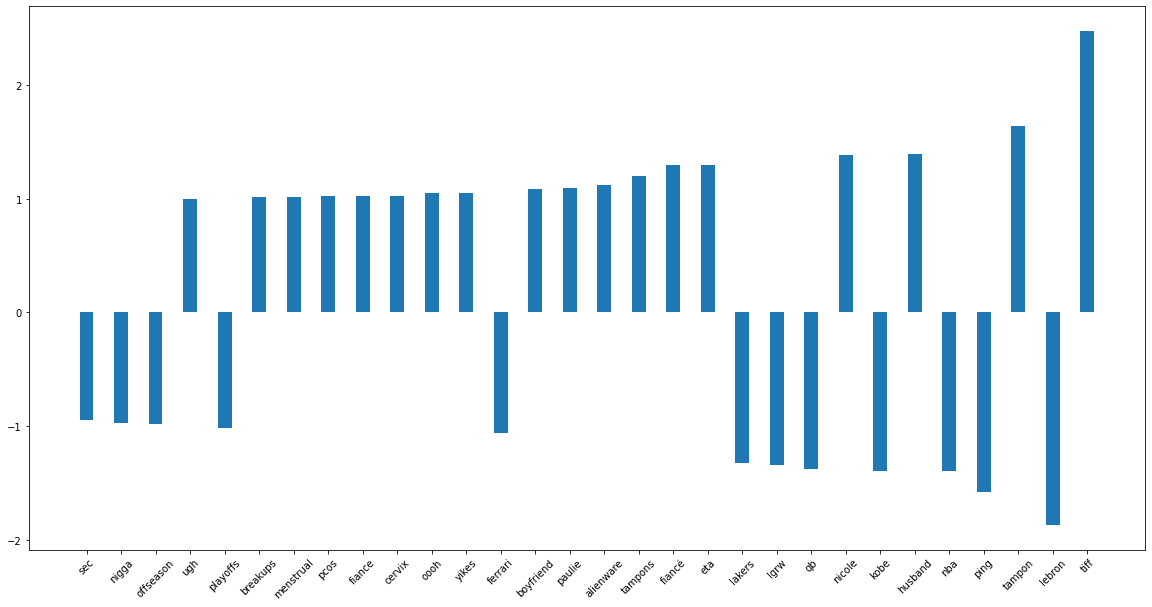

In [37]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [38]:
# visualize most freuquent words

In [39]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_df2['post_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [40]:
print(features[:30])

['__' '___' '____' '_____' '______' '_______' '________' '_________'
 '__________' '___________' '____________' '_____________'
 '______________' '_______________' '________________' '_________________'
 '__________________' '___________________' '____________________'
 '_____________________' '______________________'
 '_______________________' '________________________'
 '_________________________' '__________________________'
 '___________________________' '____________________________'
 '_____________________________' '______________________________'
 '_______________________________']


In [41]:
X.shape, len(y), len(features)

((1453512, 257488), 1453512, 257488)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['M' 'M']
[[0.85403914 0.14596086]
 [0.89639989 0.10360011]]


In [44]:
y[:2]

0    M
1    M
Name: op_gender, dtype: object

In [45]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.798841 using {'C': 1.0, 'penalty': 'l2'}
0.794532 (0.000508) with: {'C': 100, 'penalty': 'l2'}
0.796059 (0.001012) with: {'C': 10, 'penalty': 'l2'}
0.798841 (0.000381) with: {'C': 1.0, 'penalty': 'l2'}
0.796135 (0.000446) with: {'C': 0.1, 'penalty': 'l2'}
0.791043 (0.000073) with: {'C': 0.01, 'penalty': 'l2'}


In [46]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.7982483389241106


In [47]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.8013645570177611


In [48]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [49]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,0.222821,__
1,1.193576,___
2,0.907499,____
3,0.210868,_____
4,-0.208821,______
...,...,...
257483,0.000000,ﾟωﾟ
257484,-0.072868,ﾟдﾟ
257485,-0.546964,ﾟヮﾟ
257486,0.000000,ﾟﾟ


In [50]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
197557,0.000000,segall
190508,0.000000,rootbound
52875,0.000000,dears
190501,0.000000,roostercheese
190498,0.000000,rooskie
...,...,...
126974,-5.282871,lebron
105077,5.350896,husband
28356,5.788648,boyfriend
219500,6.111489,tampon


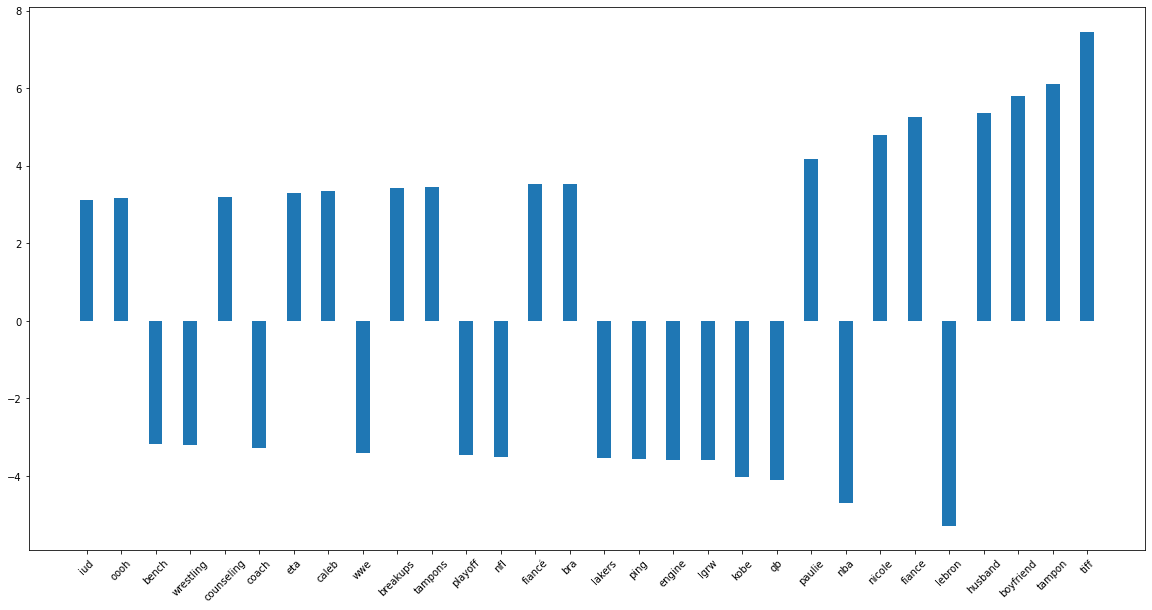

In [51]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [52]:
# visualize most freuquent words 

In [53]:
df_M = pd.DataFrame(fd_wct1_M.items(), columns=['word', 'n'])
cnt = 0 
total_words_M = sum(fd_wct1_M.values())
df_M['total_words'] = total_words_M
df_M['gender'] ='M'
df_M

,word,n,total_words,gender
0,slayer,104,21932002,M
1,task,685,21932002,M
2,perhaps?,110,21932002,M
3,black,12194,21932002,M
4,dhide,6,21932002,M
...,...,...,...,...
688540,non-cosmetic,1,21932002,M
688541,-oriented,1,21932002,M
688542,“microsoft,1,21932002,M
688543,xbox”,1,21932002,M


In [54]:
df_F = pd.DataFrame(fd_wct1_F.items(), columns=['word', 'n'])
cnt = 0 
total_words_F = sum(fd_wct1_F.values())
df_F['total_words'] = total_words_F
df_F['gender'] ='W'
df_F

,word,n,total_words,gender
0,head,2578,6834479,W
1,"op,",634,6834479,W
2,comment,4415,6834479,W
3,reddit,2858,6834479,W
4,also,18214,6834479,W
...,...,...,...,...
290403,ಠ_ಠ...,1,6834479,W
290404,verticality,2,6834479,W
290405,"shortcuts),",1,6834479,W
290406,iw(without,1,6834479,W


In [55]:
df_all_for_R = pd.concat([df_M, df_F])
df_all_for_R

,word,n,total_words,gender
0,slayer,104,21932002,M
1,task,685,21932002,M
2,perhaps?,110,21932002,M
3,black,12194,21932002,M
4,dhide,6,21932002,M
...,...,...,...,...
290403,ಠ_ಠ...,1,6834479,W
290404,verticality,2,6834479,W
290405,"shortcuts),",1,6834479,W
290406,iw(without,1,6834479,W


In [63]:
df_all_for_R1 = df_all_for_R[df_all_for_R['n']>100]

In [64]:
df_all_for_R1.to_csv("./preprocessed_data/reddit_posts_preprocressed_for_R.csv")

In [ ]:
# after running R codes for weighted log odds

In [65]:
weighted_log_odds_df = pd.read_csv("./preprocessed_data/reddit_post_weighted_log_odds.csv")
weighted_log_odds_df.sort_values(['log_odds_weighted'], inplace=True)

In [66]:
weighted_log_odds_df

,Unnamed: 0,X,word,n,total_words,gender,log_odds_weighted
29,30,33,im,138044,21932002,M,-28.183328
69,70,86,dont,160199,21932002,M,-25.085878
4879,4880,7474,boyfriend,1646,21932002,M,-25.067626
4381,4382,6644,husband,1448,21932002,M,-24.926229
143,144,171,like,188049,21932002,M,-24.502148
...,...,...,...,...,...,...,...
17823,17824,1152,boyfriend,4076,6834479,W,29.789269
17032,17033,34,like,64831,6834479,W,32.265956
17008,17009,9,dont,57716,6834479,W,32.970558
17272,17273,379,im,54344,6834479,W,36.895917


In [67]:
weighted_log_odds_df = weighted_log_odds_df.dropna()
weighted_log_odds_df

,Unnamed: 0,X,word,n,total_words,gender,log_odds_weighted
29,30,33,im,138044,21932002,M,-28.183328
69,70,86,dont,160199,21932002,M,-25.085878
4879,4880,7474,boyfriend,1646,21932002,M,-25.067626
4381,4382,6644,husband,1448,21932002,M,-24.926229
143,144,171,like,188049,21932002,M,-24.502148
...,...,...,...,...,...,...,...
18544,18545,2296,husband,3877,6834479,W,29.519629
17823,17824,1152,boyfriend,4076,6834479,W,29.789269
17032,17033,34,like,64831,6834479,W,32.265956
17008,17009,9,dont,57716,6834479,W,32.970558


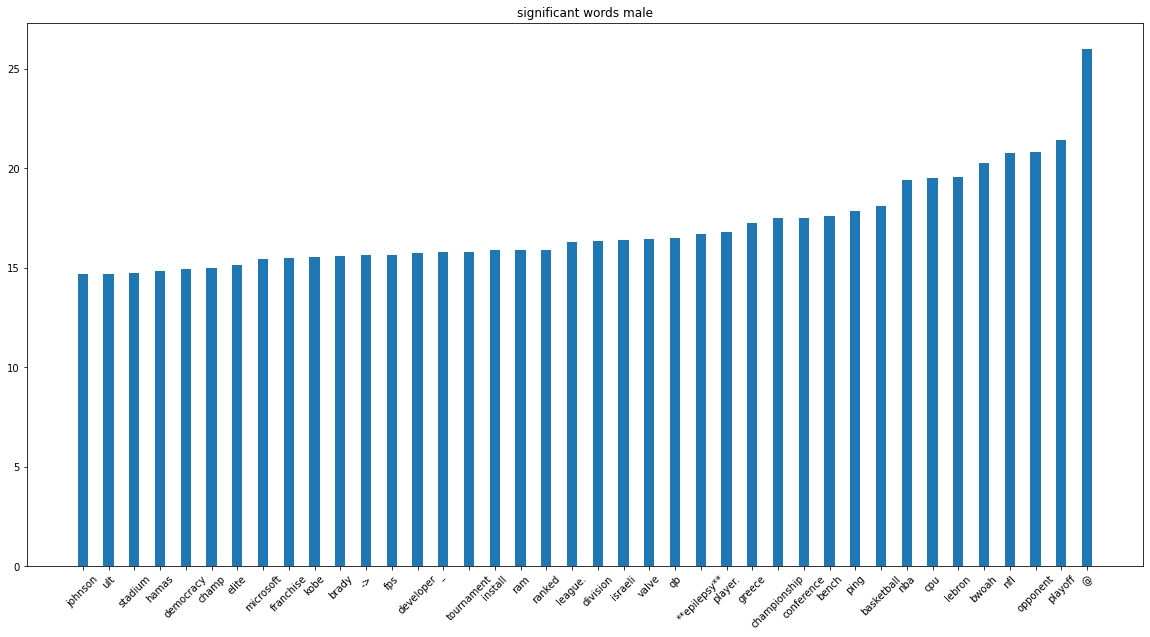

In [68]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='M']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words male")
plt.xticks(rotation=45)
plt.show()

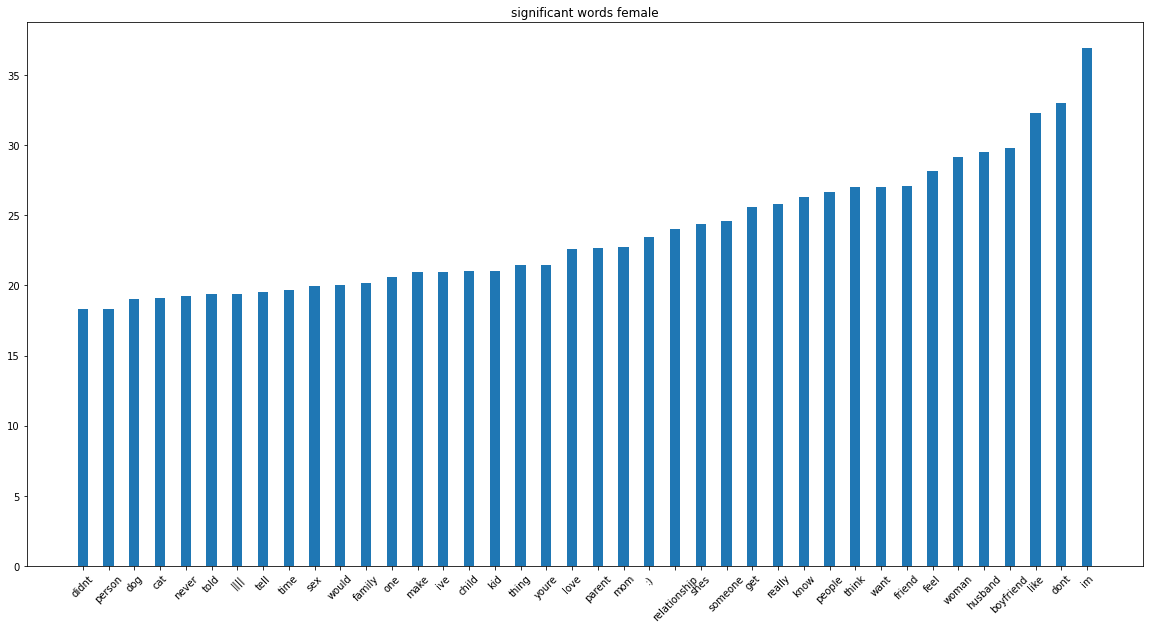

In [69]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='W']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words female")
plt.xticks(rotation=45)
plt.show()